In [125]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [126]:
#importing Data
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [127]:
df.shape

(167, 10)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [129]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Graphical Representation

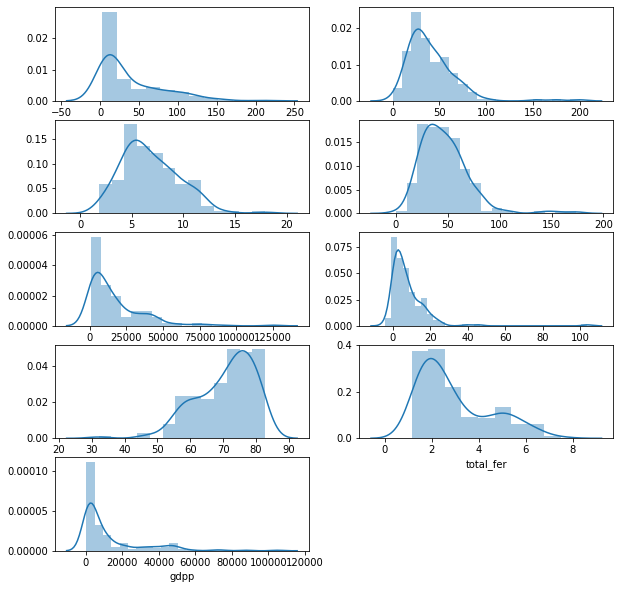

In [130]:
plt.figure(figsize = (10,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(5,2, i[0]+1)
    sns.distplot(df[i[1]])

In [131]:
#df1=df
#df1.head()

### Converting the percentage value in actual values

In [132]:
#Converting the percentage value in actual values
df['exports'] = (df['exports']/100)*df['gdpp']
df['health'] = (df['health']/100)*df['gdpp']
df['imports'] = (df['imports']/100)*df['gdpp']

In [133]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


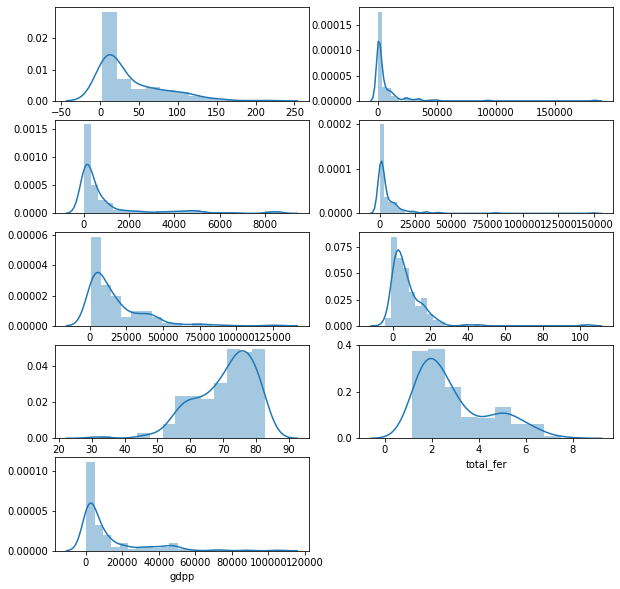

In [134]:
plt.figure(figsize = (10,10))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(5,2, i[0]+1)
    sns.distplot(df[i[1]])

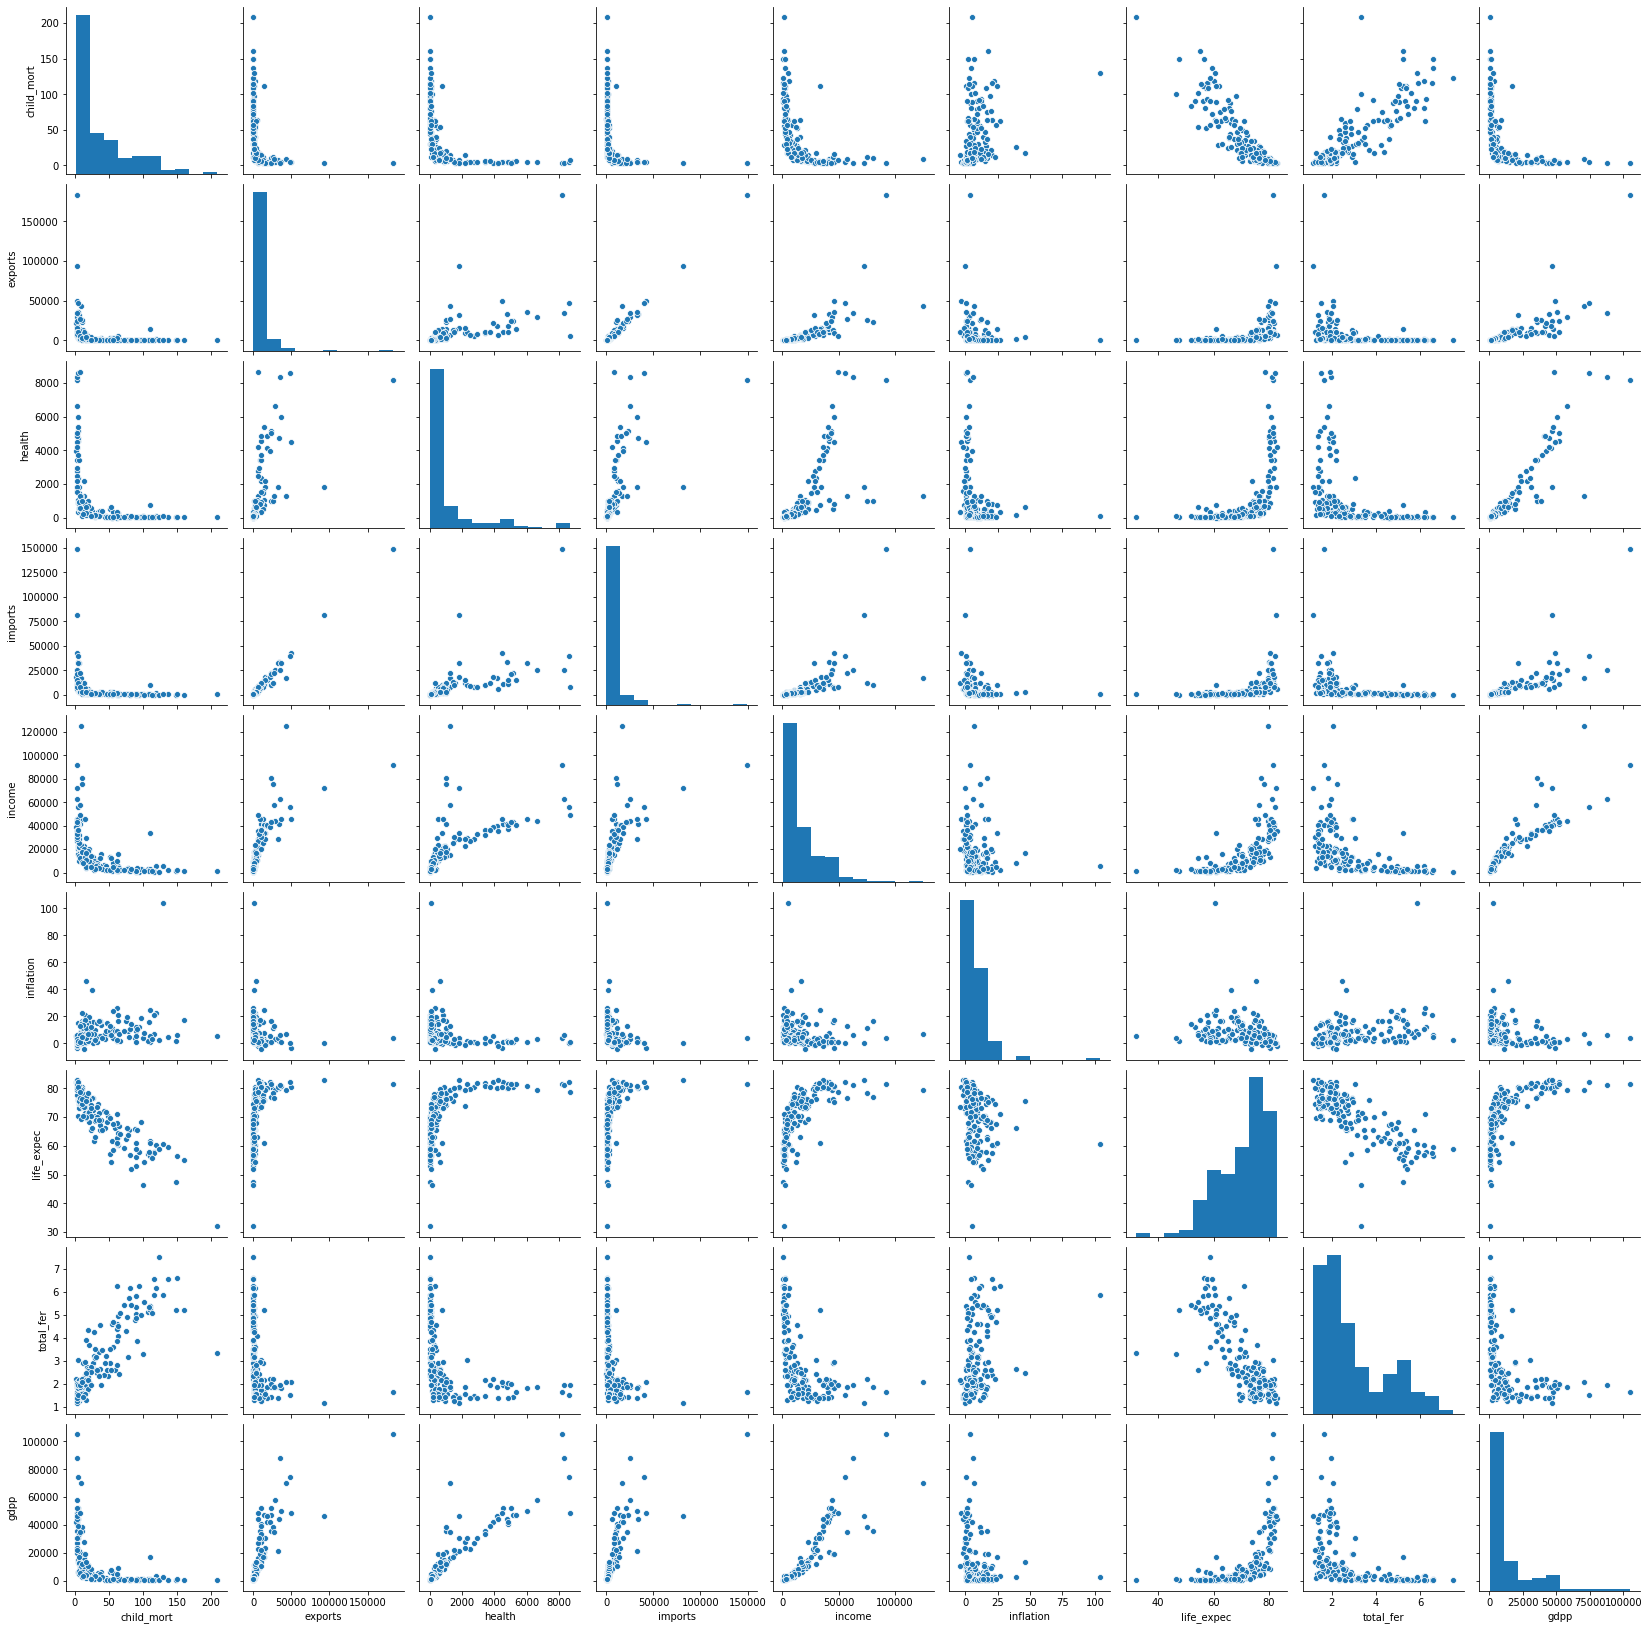

In [135]:
sns.pairplot(df)
plt.show()

### As we can see that export, import and health columns are dependent on gdpp, Lets only focus on child_mort, income and gdpp

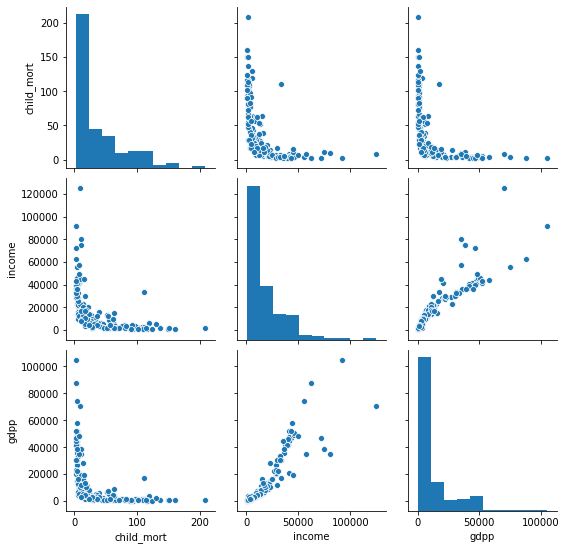

In [136]:
df1 = df[['child_mort','income','gdpp','country']]
sns.pairplot(df1)
plt.show()

## Outlier Treatment

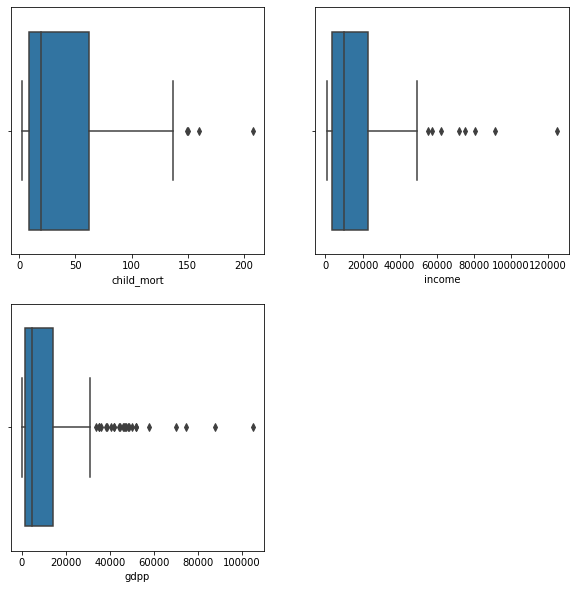

In [137]:
plt.figure(figsize = (10,10))
feature = df1.columns[:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(df[i[1]])

In [138]:
# capping

#for child mortality the capping is at lower end and basically not required
#q1 = df1['child_mort'].quantile(0.01)
#df1['child_mort'][df1['child_mort']<= q1] = q1

#for income the capping is at 99 quantile
q4 = df1['income'].quantile(0.99)
df1['income'][df1['income']>= q4] = q4

#for gdpp the capping is at 99 quantile
q4 = df1['gdpp'].quantile(0.99)
df1['gdpp'][df1['gdpp']>= q4] = q4


## Clustering

In [139]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [160]:
hopkins(df1.drop('country', axis = 1))

0.945549028837805

## Scaling

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(df1.drop('country', axis = 1))
df2

array([[ 1.29153238, -0.85166773, -0.70225949],
       [-0.5389489 , -0.38694552, -0.49872564],
       [-0.27283273, -0.2210531 , -0.47743428],
       [ 2.00780766, -0.61204534, -0.53095039],
       [-0.69563412,  0.12525431, -0.03204213],
       [-0.5911773 ,  0.1029119 , -0.14137612],
       [-0.50164289, -0.56736051, -0.5487891 ],
       [-0.8324228 ,  1.37084388,  2.25246283],
       [-0.84485813,  1.47138474,  1.9647418 ],
       [ 0.02312823, -0.04789939, -0.39802328],
       [-0.60858677,  0.33750724,  0.87715632],
       [-0.73791425,  1.35408707,  0.45708362],
       [ 0.27680906, -0.80530722, -0.69046293],
       [-0.5986385 , -0.08699862,  0.18662585],
       [-0.81501333, -0.03672819, -0.38708988],
       [-0.839884  ,  1.35408707,  1.82088129],
       [-0.48423342, -0.50145039, -0.48433959],
       [ 1.8088423 , -0.83993796, -0.69046293],
       [ 0.11017558, -0.5830002 , -0.60863507],
       [ 0.20717119, -0.6394148 , -0.62014391],
       [-0.78019439, -0.39867529, -0.468

In [142]:
df2 = pd.DataFrame(df2, columns = df1.columns[:-1])
df2.head()

,child_mort,income,gdpp
0,1.291532,-0.851668,-0.702259
1,-0.538949,-0.386946,-0.498726
2,-0.272833,-0.221053,-0.477434
3,2.007808,-0.612045,-0.530950
4,-0.695634,0.125254,-0.032042


## K-Means Clustering

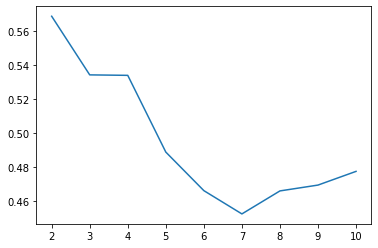

In [143]:
# Choose the value of K
# Silhouette score

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df2)
    ss.append([k, silhouette_score(df2, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

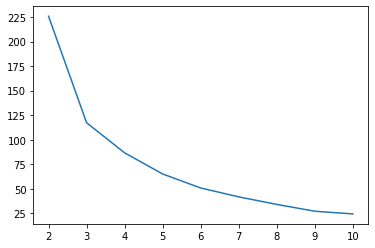

In [144]:
#Elbow curve
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df2)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

In [145]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [146]:
df_kmean = df1.copy()

In [147]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


In [148]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,child_mort,income,gdpp,country,label
0,90.2,1610.0,553.0,Afghanistan,2
1,16.6,9930.0,4090.0,Albania,0
2,27.3,12900.0,4460.0,Algeria,0
3,119.0,5900.0,3530.0,Angola,2
4,10.3,19100.0,12200.0,Antigua and Barbuda,0


In [149]:
df_kmean.label.value_counts()

0    90
2    45
1    32
Name: label, dtype: int64

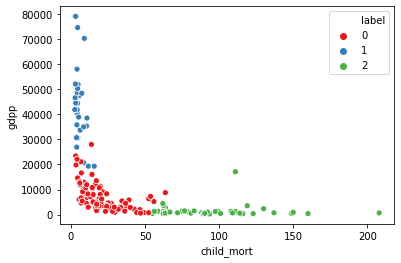

In [150]:
# Plot the cluster
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')

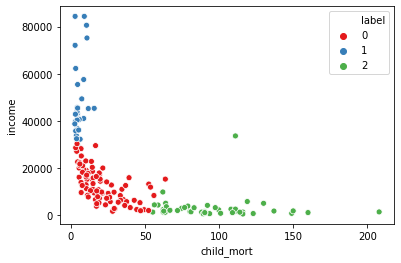

In [151]:
# Plot the cluster
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

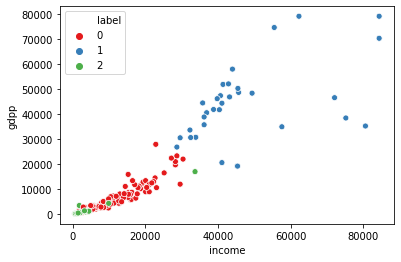

In [152]:
# Plot the cluster
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')

### Here we can see that the label group 2 has more need for the funds based on data. Lets carry out cluster profile to explore more

## Cluster Profile

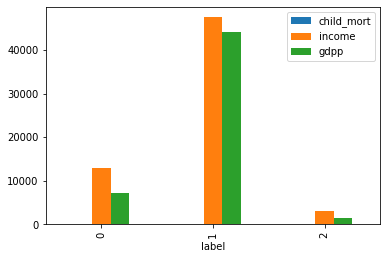

In [153]:
# Making sense out of the clsuters
df_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')

### As we can see that we need to focus on label 2 for the deirest need of countries lets explore it in more detail

In [154]:
df_kmean[df_kmean['label'] == 2]

,child_mort,income,gdpp,country,label
0,90.2,1610.0,553.0,Afghanistan,2
3,119.0,5900.0,3530.0,Angola,2
17,111.0,1820.0,758.0,Benin,2
25,116.0,1430.0,575.0,Burkina Faso,2
26,93.6,764.0,231.0,Burundi,2
28,108.0,2660.0,1310.0,Cameroon,2
31,149.0,888.0,446.0,Central African Republic,2
32,150.0,1930.0,897.0,Chad,2
36,88.2,1410.0,769.0,Comoros,2
37,116.0,609.0,334.0,"Congo, Dem. Rep.",2


In [156]:
df_kmean[df_kmean['label'] == 2].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True,True]).head(5)



,child_mort,income,gdpp,country,label
66,208.0,1500.0,662.0,Haiti,2
132,160.0,1220.0,399.0,Sierra Leone,2
32,150.0,1930.0,897.0,Chad,2
31,149.0,888.0,446.0,Central African Republic,2
97,137.0,1870.0,708.0,Mali,2


## Hierarchical Clustering

In [161]:
df2.head()

,child_mort,income,gdpp
0,1.291532,-0.851668,-0.702259
1,-0.538949,-0.386946,-0.498726
2,-0.272833,-0.221053,-0.477434
3,2.007808,-0.612045,-0.530950
4,-0.695634,0.125254,-0.032042


In [163]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

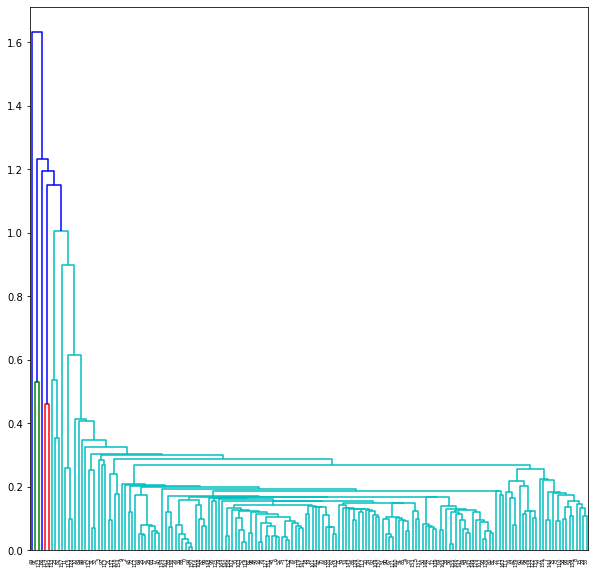

In [167]:
# single linkage
plt.figure(figsize = (10,10))
mergings = linkage(df2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

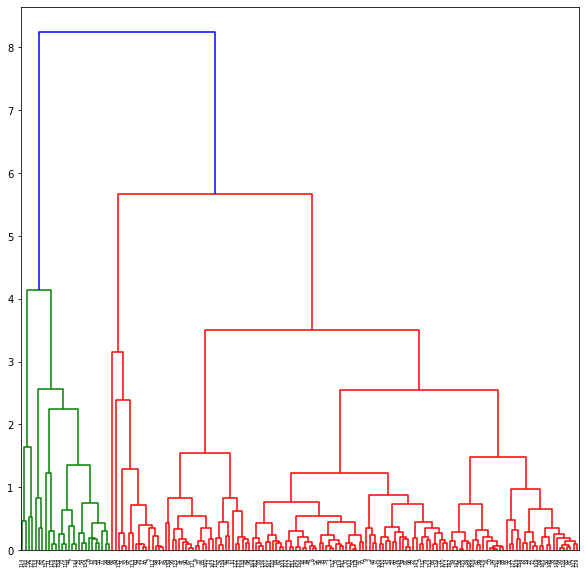

In [168]:
# complete linkage
plt.figure(figsize = (10,10))
mergings = linkage(df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [169]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [171]:
# assign cluster labels
df1['cluster_labels'] = cluster_labels
df1.head()

,child_mort,income,gdpp,country,cluster_labels
0,90.2,1610.0,553.0,Afghanistan,0
1,16.6,9930.0,4090.0,Albania,0
2,27.3,12900.0,4460.0,Algeria,0
3,119.0,5900.0,3530.0,Angola,1
4,10.3,19100.0,12200.0,Antigua and Barbuda,0


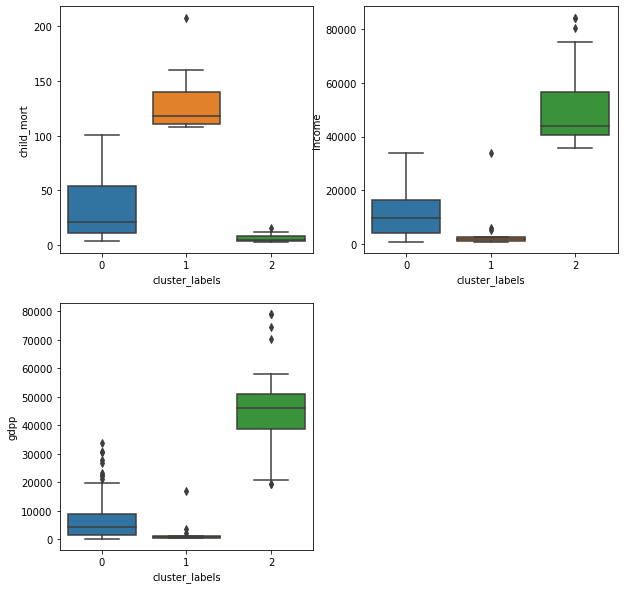

In [173]:
# plots
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(x='cluster_labels', y='child_mort', data=df1)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_labels', y='income', data=df1)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_labels', y='gdpp', data=df1)

### Here we can see the cluster 1 is in the direst need of funds

In [175]:
df1[df1['cluster_labels'] == 1]

,child_mort,income,gdpp,country,cluster_labels
3,119.0,5900.0,3530.0,Angola,1
17,111.0,1820.0,758.0,Benin,1
25,116.0,1430.0,575.0,Burkina Faso,1
28,108.0,2660.0,1310.0,Cameroon,1
31,149.0,888.0,446.0,Central African Republic,1
32,150.0,1930.0,897.0,Chad,1
37,116.0,609.0,334.0,"Congo, Dem. Rep.",1
40,111.0,2690.0,1220.0,Cote d'Ivoire,1
49,111.0,33700.0,17100.0,Equatorial Guinea,1
63,109.0,1190.0,648.0,Guinea,1


In [178]:
df1[df1['cluster_labels'] == 1].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True,True]).head(5)


,child_mort,income,gdpp,country,cluster_labels
66,208.0,1500.0,662.0,Haiti,1
132,160.0,1220.0,399.0,Sierra Leone,1
32,150.0,1930.0,897.0,Chad,1
31,149.0,888.0,446.0,Central African Republic,1
97,137.0,1870.0,708.0,Mali,1
